# Capstone 1 - Experimental Design

## 1. Introduction

In March 2023, the governing body of professional golf, the USGA, proposed a rule change which would ban golf balls that fly over 317 yards when struck at 127 miles per hour with an optimum launch angle. The rule change was proposed by those who say, “Predictable, continued increases (in ball flight distances) will become a significant issue for the next generation if not addressed soon.” This proposal has sparked a conversation about the need for such a major change as it would have far reaching consequences from player strategy to golf course design.

For this analysis I will be focusing on comparing PGA Tour players from 2022 and on average how much further they are driving the ball and scoring lower than PGA Tour players from 2003.

## 2. Hypotheses

**Driving Distance**

<font size="3">**H₀:**</font> <font size="2">  There is no significant difference between the average driving distances of current day PGA players and PGA players from 20 years ago.</font>

<font size="3">**Hₐ:**</font> <font size="2">  There is a significant difference between the average driving distances of current day PGA players and PGA players from 20 years ago.</font>

**Scores**

<font size="3">**H₀:**</font> <font size="2">  There is no significant difference between the average scores of current day PGA players and PGA players from 20 years ago.</font>

<font size="3">**Hₐ:**</font> <font size="2">  There is a significant difference between the average scores of current day PGA players and PGA players from 20 years ago.</font>


## 3. Data

The dataset is from [ESPN](https://www.espn.com/golf/stats/player/_/season/2023/table/general/sort/yardsPerDrive/dir/desc) and contains 3832 records and 18 variables. There are a handful of 0 values for tour players subject to unique circumstances such as leaving the PGA Tour to play on the LIV Tour. Other than that there are no missing values or empty entries. 191 of those records are from 2003 and 194 are from 2022.

In [1]:
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
import math

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns 
sns.set()

In [2]:
pga = pd.read_csv('https://raw.githubusercontent.com/SouthSilly/Thinkful/main/pga_all.csv')

In [3]:
print(pga.shape)
print()
pga.info()

(3832, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      3832 non-null   int64  
 1   name      3832 non-null   object 
 2   age       3832 non-null   object 
 3   earnings  3832 non-null   object 
 4   cup       3832 non-null   int64  
 5   events    3832 non-null   int64  
 6   rounds    3832 non-null   int64  
 7   cuts      3832 non-null   int64  
 8   top10     3832 non-null   int64  
 9   wins      3832 non-null   int64  
 10  score     3832 non-null   float64
 11  ddis      3832 non-null   float64
 12  dacc      3832 non-null   float64
 13  girr      3832 non-null   float64
 14  putts     3832 non-null   float64
 15  sand      3832 non-null   float64
 16  birds     3832 non-null   float64
 17  year      3832 non-null   int64  
dtypes: float64(7), int64(8), object(3)
memory usage: 539.0+ KB


In [12]:
# describe numerical columns
pga.describe()

,rank,cup,events,rounds,cuts,top10,wins,score,ddis,dacc,girr,putts,sand,birds,year
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.00000,3832.000000
mean,96.353079,7237.448852,23.730428,75.104906,14.600731,2.593424,0.228601,70.641519,291.512396,62.094572,64.857907,1.774307,49.574791,3.51770,2012.823591
std,55.516185,24875.526747,5.964844,17.588512,4.829516,2.456117,0.623172,2.672720,10.603013,5.491810,3.424268,0.039373,6.341214,0.36349,6.223010
min,1.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2003.000000
25%,48.000000,0.000000,21.000000,63.000000,11.000000,1.000000,0.000000,70.300000,285.100000,58.500000,63.000000,1.757000,45.500000,3.30600,2007.000000
50%,96.000000,0.000000,25.000000,77.000000,15.000000,2.000000,0.000000,70.700000,291.300000,62.150000,65.200000,1.775000,50.000000,3.52400,2012.000000
75%,144.000000,592.250000,28.000000,88.000000,18.000000,4.000000,0.000000,71.200000,297.700000,65.800000,67.100000,1.793000,53.700000,3.73000,2019.000000
max,203.000000,125101.000000,36.000000,124.000000,30.000000,18.000000,9.000000,74.900000,326.600000,78.400000,74.200000,1.888000,78.300000,5.15200,2023.000000


In [7]:
# data snippet
pga.head()

,rank,name,age,earnings,cup,events,rounds,cuts,top10,wins,score,ddis,dacc,girr,putts,sand,birds,year
0,1,Rory McIlroy,33,"$5,333,286",1010,7,20,5,3,1,70.3,326.6,53.9,63.9,1.791,48.1,3.950,2023
1,2,Brandon Matthews,28,"$86,549",42,16,37,4,0,0,71.7,320.4,47.0,64.9,1.785,33.9,3.568,2023
2,3,Cameron Young,25,"$4,002,275",672,10,36,10,3,0,70.0,316.3,58.9,68.4,1.736,40.0,4.750,2023
3,4,Cameron Champ,27,"$361,296",91,12,28,2,1,0,72.3,315.1,53.6,63.5,1.809,39.5,3.250,2023
4,4,Matti Schmid,25,"$328,823",117,14,39,5,1,0,71.7,315.1,56.2,65.1,1.779,45.3,3.667,2023


In [17]:
# null values, none exist
pga.isnull().sum()

rank        0
name        0
age         0
earnings    0
cup         0
events      0
rounds      0
cuts        0
top10       0
wins        0
score       0
ddis        0
dacc        0
girr        0
putts       0
sand        0
birds       0
year        0
dtype: int64

count    3832.000000
mean      291.512396
std        10.603013
min         0.000000
25%       285.100000
50%       291.300000
75%       297.700000
max       326.600000
Name: ddis, dtype: float64

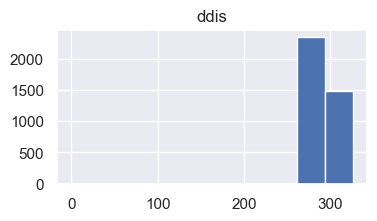

In [30]:
pga.hist(column='ddis',figsize=(4,2))
pga.ddis.describe()

# There is a 0 value showing for driving distance

count    3832.000000
mean       70.641519
std         2.672720
min         0.000000
25%        70.300000
50%        70.700000
75%        71.200000
max        74.900000
Name: score, dtype: float64

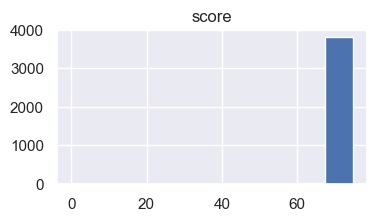

In [31]:
pga.hist(column='score',figsize=(4,2))
pga.score.describe()

# There is a 0 value showing for score

In [6]:
# 0 values for tour pros in these attributes are errors and should be removed before any analysis
pga[((pga.ddis==0) | (pga.score==0)).values]

,rank,name,age,earnings,cup,events,rounds,cuts,top10,wins,score,ddis,dacc,girr,putts,sand,birds,year
11,12,Dean Burmester,33,"$576,165",212,8,0,7,1,0,0.0,311.6,57.8,70.7,1.736,43.2,0.0,2023
148,148,Cole Hammer,23,0,0,0,0,5,1,0,0.0,292.4,56.2,61.3,1.777,40.8,0.0,2023
326,127,Branden Grace,34,0,0,17,0,8,2,0,0.0,296.4,60.1,65.4,1.799,54.9,0.0,2022
369,170,Patrick Reed,32,0,0,19,0,16,2,0,0.0,290.6,59.2,62.8,1.760,57.4,0.0,2022
393,203,Aaron Baddeley,42,"$199,830",96,13,0,6,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,2022


In [3]:
# removing the records with errors
pga = pga[(( pga['score']!=0 ) ).values] # remove scores of 0
pga = pga[(( pga['ddis'] !=0 ) ).values] # remove driving distance of 0

pga[((pga.ddis==0) | (pga.score==0)).values] # check for 0 values again, no records show

,rank,name,age,earnings,cup,events,rounds,cuts,top10,wins,score,ddis,dacc,girr,putts,sand,birds,year


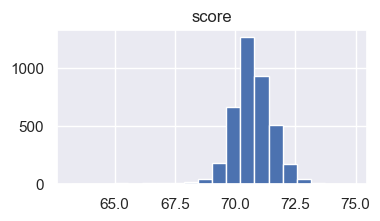

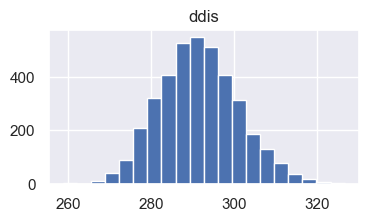

In [79]:
# Check overall distrubutions shape
pga.hist(column='score',figsize=(4,2),bins=20)
pga.hist(column='ddis' ,figsize=(4,2),bins=20)
plt.show()

## 4. Methods

I will create two DataFrames, one containing all records for 2022 PGA Tour players and the other for all PGA Tour players from 2003. I feel this is a more stable approach than combining recent seasons and comparing against a range of seasons in the past as it will allow a more precise comparison between samples.
I will use data visualizations to get an initial sense of the data distribution but I will also formally test for normalcy and measure skewness and kurtosis. After establishing that there is a normal distribution within the samples, I will use a t-test to compare the means of driving distances and scores between the two groups: PGA tour players from 2022 and PGA tour players from 2003. The t-test will allow for a quantitative assessment of the significance of any observed differences in means at the two-tail, 95% confidence interval.

In [8]:
pga_2003 = pga[pga.year==2003]
pga_2022 = pga[pga.year==2022]

print(pga_2003.info())
print(pga_2022.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 3641 to 3831
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      191 non-null    int64  
 1   name      191 non-null    object 
 2   age       191 non-null    object 
 3   earnings  191 non-null    object 
 4   cup       191 non-null    int64  
 5   events    191 non-null    int64  
 6   rounds    191 non-null    int64  
 7   cuts      191 non-null    int64  
 8   top10     191 non-null    int64  
 9   wins      191 non-null    int64  
 10  score     191 non-null    float64
 11  ddis      191 non-null    float64
 12  dacc      191 non-null    float64
 13  girr      191 non-null    float64
 14  putts     191 non-null    float64
 15  sand      191 non-null    float64
 16  birds     191 non-null    float64
 17  year      191 non-null    int64  
dtypes: float64(7), int64(8), object(3)
memory usage: 28.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64

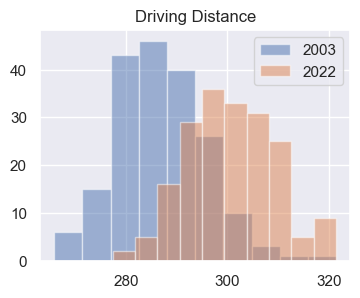

2003
DescribeResult(nobs=191, minmax=(265.9, 321.4), mean=286.6628272251309, variance=77.19024249104433, skewness=0.4766914244311579, kurtosis=0.7483236283603638)
ShapiroResult(statistic=0.983161449432373, pvalue=0.021563097834587097)
2022
DescribeResult(nobs=191, minmax=(277.4, 321.4), mean=300.56125654450267, variance=75.48006999173325, skewness=0.08874226033392771, kurtosis=-0.298698570178757)
ShapiroResult(statistic=0.9930216073989868, pvalue=0.49980393052101135)



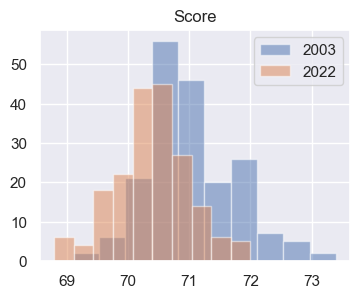

2003
DescribeResult(nobs=191, minmax=(69.1, 73.4), mean=71.01937172774869, variance=0.5065174979333154, skewness=0.558056660615517, kurtosis=0.6374858040341529)
ShapiroResult(statistic=0.9754149317741394, pvalue=0.0019185396376997232)
2022
DescribeResult(nobs=191, minmax=(68.8, 72.0), mean=70.3890052356021, variance=0.37614163681454893, skewness=-0.05552791363809193, kurtosis=0.17524765602618952)
ShapiroResult(statistic=0.9909504652023315, pvalue=0.27522557973861694)


In [80]:
# visualize and test for normalcy

#driving distance

plt.subplots(figsize=(4,3))
plt.title('Driving Distance')
plt.hist(pga_2003.ddis,alpha= 0.5, label='2003')
plt.hist(pga_2022.ddis,alpha= 0.5, label='2022')

plt.legend()
plt.show()

print(2003)
print(stats.describe(pga_2003.ddis))
print(stats.shapiro(pga_2003.ddis))
print(2022)
print(stats.describe(pga_2022.ddis))
print(stats.shapiro(pga_2022.ddis))
print()

# score

plt.subplots(figsize=(4,3))
plt.title('Score')
plt.hist(pga_2003.score,alpha= 0.5, label='2003')
plt.hist(pga_2022.score,alpha= 0.5, label='2022')

plt.legend()
plt.show()

print(2003)
print(stats.describe(pga_2003.score))
print(stats.shapiro(pga_2003.score))
print(2022)
print(stats.describe(pga_2022.score))
print(stats.shapiro(pga_2022.score))


In [65]:
# t-test
# variances are equal, variance rule of thumb

# driving distance
print('Driving Distance:')
print(stats.ttest_ind(pga_2003.ddis, pga_2022.ddis))

# score
print('Score:')
print(stats.ttest_ind(pga_2003.score, pga_2022.score))

Driving Distance:
Ttest_indResult(statistic=-15.545514822111567, pvalue=1.579758252188492e-42)
Score:
Ttest_indResult(statistic=9.272851252244346, pvalue=1.3865228182935419e-18)


In [74]:
# confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(round(ci_lower,2))+" and "+str(round(ci_upper,2))+".")

print('Driving Distance')
print(get_95_ci(pga_2003.ddis, pga_2022.ddis))
print()
print('2003 mean: ' + str(round(pga_2003.ddis.mean(),2)))
print('2022 mean: ' + str(round(pga_2022.ddis.mean(),2)))

print()
print('Score')
print(get_95_ci(pga_2003.score, pga_2022.score))

print()
print('2003 mean: ' + str(round(pga_2003.score.mean(),2)))
print('2022 mean: ' + str(round(pga_2022.score.mean(),2)))

Driving Distance
The difference in means at the 95% confidence interval (two-tail) is between 12.15 and 15.65.

2003 mean: 286.66
2022 mean: 300.56

Score
The difference in means at the 95% confidence interval (two-tail) is between -0.76 and -0.5.

2003 mean: 71.02
2022 mean: 70.39


## 5. Results

After visually inspecting, both the driving distance and score distributions appear close to normally distributed. Additionally, I ran a Shapiro-Wilkes test for both samples in each test (Driving distance and Score). In each evaluation the Shapiro-Wilkes test shows a p-value < 0.05 for 2003 data but the W statistic is close to 1. The Shapiro-Wilkes test is sensitive to small and unimportant deviations from normality, and since skewness and kurtosis are both < 1 (for both 2003 and 2022) and it passes the eye test, I proceeded with the t-tests. Based on a p-value of `0.05`, I reject both null hypotheses that there is not a significant difference in means.

**Driving Distance**

The 95% confidence interval advises that the difference in average driving distance between 2003 and 2022 PGA Tour players is between 12.15 and 15.65 yards.

**Score**

The 95% confidence interval advises that the difference in average scores between 2003 and 2022 PGA Tour players is between -0.76 and -0.5 strokes.

## 6. Discussion


**Driving Distance**

On average driving distance is significantly longer for 2022 PGA Tour players than their counterparts in 2003. This increase can attributed to many factors such as improved club technology, more events scheduled during warmer months, improved fitness regimens of newer players or even improved course knowledge with access to new data like landing zones and roll out distances. To take this analysis a step further, I will proceed to see how PGA tour courses have changed, perhaps in response to these increased driving distances, by changing their layout or making the course longer. For example, this year at The Masters, in order to make the typically easiest hole on the course more difficult, Augusta National lengthened the 12th hole by moving the tee box 35 yards back. After completing an A/B test for that query I will have a more complete picture of the merit behind the controversial rule change proposal for stakeholders to be well informed.

**Score**

On average score is significantly lower for 2022 PGA Tour players than their counterparts in 2003. Again, this difference can be attributed to a number of factors but the one that sticks out the most to me as a fan is putting. Greens (putting surfaces) today are mapped out using gps and topographic tools so that players know exactly how a ball will roll on any part of the green, this technology did not exist in 2003. As a next step I will conduct an A/B test on 'strokes gained from putting' a metric that quantifies how many strokes a player gains on the field due to their putting performance. While this topic has less to do with the proposed rule change, the results may give us more insight into where the reduction in average scores between 2003 and 2022 are coming from.
